In [243]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from graphviz import Graph
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
from xgboost import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline
sns.set_style("white", {'axes.grid' : True})
sns.set_palette("tab10", 14)
sns.set_context('talk')

In [19]:
# Reading in the data including uber data
data=pd.read_csv('data_uber.csv')
data.head()

,ride_id,travel_time,max_capacity,number_of_ticket,daily_mean,daily_min,daily_max,tf_mean,tf_min,tf_max,...,travel_from_Sori,car_type_Bus,car_type_shuttle,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tue,day_Wed
0,1442,7.250000,49,1.0,2734.0,1947.0,4061.0,2978.0,2014.0,4864.0,...,0,1,0,0,0,0,0,0,1,0
1,14304,5.166667,49,1.0,2974.0,1806.0,5122.0,3011.0,1859.0,5007.0,...,0,1,0,0,0,0,0,0,1,0
2,5437,7.200000,49,1.0,1905.0,1437.0,2598.0,1921.0,1439.0,2651.0,...,0,1,0,0,0,0,1,0,0,0
3,5710,7.083333,49,1.0,2181.0,1474.0,3350.0,2115.0,1458.0,3133.0,...,0,1,0,0,0,0,1,0,0,0
4,13577,9.000000,11,11.0,3121.0,1634.0,6066.0,3634.0,1840.0,7340.0,...,0,0,1,0,1,0,0,0,0,0


In [20]:
# Separating out the original train and test set from the source data
train_X = data[data['number_of_ticket'].notnull()]
train_y = train_X['number_of_ticket']
del train_X['number_of_ticket']
del train_X['ride_id']

# Creating the test set
test_X =  data[data['number_of_ticket'].isnull()]
# creating a series for test_X ride_id to use when creating submissions
ride_id_df = test_X['ride_id']
del test_X['number_of_ticket']
del test_X['ride_id']

In [21]:
data.head()

,ride_id,travel_time,max_capacity,number_of_ticket,daily_mean,daily_min,daily_max,tf_mean,tf_min,tf_max,...,travel_from_Sori,car_type_Bus,car_type_shuttle,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tue,day_Wed
0,1442,7.250000,49,1.0,2734.0,1947.0,4061.0,2978.0,2014.0,4864.0,...,0,1,0,0,0,0,0,0,1,0
1,14304,5.166667,49,1.0,2974.0,1806.0,5122.0,3011.0,1859.0,5007.0,...,0,1,0,0,0,0,0,0,1,0
2,5437,7.200000,49,1.0,1905.0,1437.0,2598.0,1921.0,1439.0,2651.0,...,0,1,0,0,0,0,1,0,0,0
3,5710,7.083333,49,1.0,2181.0,1474.0,3350.0,2115.0,1458.0,3133.0,...,0,1,0,0,0,0,1,0,0,0
4,13577,9.000000,11,11.0,3121.0,1634.0,6066.0,3634.0,1840.0,7340.0,...,0,0,1,0,1,0,0,0,0,0


In [22]:
data.shape

(7360, 36)

In [251]:
train_X.head()

,travel_time,max_capacity,daily_mean,daily_min,daily_max,tf_mean,tf_min,tf_max,travel_from_Awendo,travel_from_Homa Bay,...,travel_from_Sori,car_type_Bus,car_type_shuttle,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tue,day_Wed
0,7.250000,49,2734.0,1947.0,4061.0,2978.0,2014.0,4864.0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,5.166667,49,2974.0,1806.0,5122.0,3011.0,1859.0,5007.0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,7.200000,49,1905.0,1437.0,2598.0,1921.0,1439.0,2651.0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,7.083333,49,2181.0,1474.0,3350.0,2115.0,1458.0,3133.0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,9.000000,11,3121.0,1634.0,6066.0,3634.0,1840.0,7340.0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [252]:
test_X.head()

,travel_time,max_capacity,daily_mean,daily_min,daily_max,tf_mean,tf_min,tf_max,travel_from_Awendo,travel_from_Homa Bay,...,travel_from_Sori,car_type_Bus,car_type_shuttle,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tue,day_Wed
6249,8.000000,49,2298.0,1263.0,4252.0,2296.0,1258.0,4276.0,0,0,...,0,1,0,0,0,1,0,0,0,0
6250,23.166667,49,2298.0,1263.0,4252.0,2204.0,1248.0,3907.0,0,0,...,0,1,0,0,0,1,0,0,0,0
6251,7.183333,49,2298.0,1263.0,4252.0,2296.0,1258.0,4276.0,0,1,...,0,1,0,0,0,1,0,0,0,0
6252,7.083333,49,2298.0,1263.0,4252.0,2296.0,1258.0,4276.0,0,0,...,0,1,0,0,0,1,0,0,0,0
6253,7.083333,49,2298.0,1263.0,4252.0,2296.0,1258.0,4276.0,0,0,...,0,1,0,0,0,1,0,0,0,0


# Building the model - XGBoost
https://machinelearningmastery.com/xgboost-python-mini-course/

In [23]:
# Name and set parameters for the model - in theis case a random forest
xgb_model0 = XGBRegressor(random_state=1, criterion ='mae')
# Fit the model to the training data
xgb_model0.fit(train_X, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, criterion='mae', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [25]:
xgb_model0_preds = xgb_model0.predict(train_X)

In [28]:
# Compare the predctions with the actual test results ie test_v_y
print ('xgb_model0 mae:',mean_absolute_error(xgb_model0_preds, train_y))
# generated score - level of accuracy but not sure how its measured
print ('xgb_model0 train score:',xgb_model0.score( train_X , train_y ))

xgb_model0 mae: 3.9184931859500427
xgb_model0 train score: 0.5690662385582181


# Setting up a train test split to test the model

In [29]:
# set the validation model with train_v_X being the training element, valied_X being the test element and same for y
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
train_v_X , test_v_X , train_v_y , test_v_y = train_test_split( train_X , train_y , test_size = .2, random_state=0 )
# Printing the shape of the
print( train_v_X.shape, train_v_y.shape)
print (test_v_X.shape, test_v_y.shape)

(4999, 34) (4999,)
(1250, 34) (1250,)


## Fitting the model to validation training set

In [60]:
# Name and set parameters for the model - in theis case a random forest
xgb_model1 = XGBRegressor(random_state=1, criterion ='mae',)
# Fit the model to the training data
xgb_model1.fit(train_v_X, train_v_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, criterion='mae', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [61]:
xgb_model1_v_preds = xgb_model1.predict(test_v_X)

In [62]:
# Compare the predctions with the actual test results ie test_v_y
print ('mae:',mean_absolute_error(xgb_model1_v_preds, test_v_y))
# generated score - level of accuracy but not sure how its measured
print ('train score / test score:',xgb_model1.score( train_v_X , train_v_y ), xgb_model1.score( test_v_X , test_v_y ))

mae: 3.984978717470169
train score / test score: 0.5675929852604082 0.5296398421005948


In [63]:
# Scores achieved when running 10 cross validations - huge variation!
scores = cross_val_score(xgb_model1, train_X, train_y, cv=10)
scores 

array([0.14600813, 0.3693256 , 0.39634711, 0.4011912 , 0.50655034,
       0.609934  , 0.59662317, 0.62221805, 0.57511762, 0.58326706])

In [64]:
# Now run the model on the training set and see what it predicts
xgb_model1_train_preds = xgb_model1.predict(train_X)
# Compare the predctions with the actual training values using mae as specified int he competition
print ('mae:',mean_absolute_error(xgb_model1_train_preds, train_y))
# generated score - level of accuracy but not sure how its measured
print ('train score:', xgb_model1.score( train_X , train_y ))

mae: 3.923500079153099
train score: 0.5602569652593907


In [ ]:
# It is not really overfitting as it does not have a better performance on itself (train) to what it does on test
# Does this mean its underfitting?

# Introducing early stopping rounds

In [65]:
# This process shows the mae following each successive tree (n_estimator) is generated. 
# Early stopping will stope the iteration process once no further imoprovements are made
eval_set = [(test_v_X, test_v_y)]
xgb_model1.fit(train_v_X, train_v_y, eval_metric="mae", eval_set=eval_set, verbose=True)

# WIth n_estimates = 100 it gets to the end and doesn;t stop

[0]	validation_0-mae:7.0563
[1]	validation_0-mae:6.63595
[2]	validation_0-mae:6.29116
[3]	validation_0-mae:6.03924
[4]	validation_0-mae:5.82091
[5]	validation_0-mae:5.63079
[6]	validation_0-mae:5.47855
[7]	validation_0-mae:5.35661
[8]	validation_0-mae:5.25301
[9]	validation_0-mae:5.16414
[10]	validation_0-mae:5.09
[11]	validation_0-mae:5.043
[12]	validation_0-mae:4.94254
[13]	validation_0-mae:4.87366
[14]	validation_0-mae:4.80991
[15]	validation_0-mae:4.77616
[16]	validation_0-mae:4.70862
[17]	validation_0-mae:4.66621
[18]	validation_0-mae:4.6217
[19]	validation_0-mae:4.58634
[20]	validation_0-mae:4.54899
[21]	validation_0-mae:4.51005
[22]	validation_0-mae:4.4867
[23]	validation_0-mae:4.48057
[24]	validation_0-mae:4.44757
[25]	validation_0-mae:4.4418
[26]	validation_0-mae:4.42299
[27]	validation_0-mae:4.41979
[28]	validation_0-mae:4.39227
[29]	validation_0-mae:4.35548
[30]	validation_0-mae:4.33491
[31]	validation_0-mae:4.33049
[32]	validation_0-mae:4.31924
[33]	validation_0-mae:4.31655

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, criterion='mae', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [271]:
# Name and set parameters for the model - in theis case a random forest
xgb_model2 = XGBRegressor(random_state=1, criterion ='mae', n_estimators = 1000)
# Fit the model to the training data
xgb_model2.fit(train_v_X, train_v_y, eval_metric="mae", eval_set=eval_set, early_stopping_rounds = 100, verbose=True)
# 1000 estiators with an early stoppung of 100 gives best at 559 3.679
# 10000 estimators with early stoppng round of 1000 gives best at [949]	validation_0-mae:3.63338

[0]	validation_0-mae:7.0563
Will train until validation_0-mae hasn't improved in 100 rounds.
[1]	validation_0-mae:6.63595
[2]	validation_0-mae:6.29116
[3]	validation_0-mae:6.03924
[4]	validation_0-mae:5.82091
[5]	validation_0-mae:5.63079
[6]	validation_0-mae:5.47855
[7]	validation_0-mae:5.35661
[8]	validation_0-mae:5.25301
[9]	validation_0-mae:5.16414
[10]	validation_0-mae:5.09
[11]	validation_0-mae:5.043
[12]	validation_0-mae:4.94254
[13]	validation_0-mae:4.87366
[14]	validation_0-mae:4.80991
[15]	validation_0-mae:4.77616
[16]	validation_0-mae:4.70862
[17]	validation_0-mae:4.66621
[18]	validation_0-mae:4.6217
[19]	validation_0-mae:4.58634
[20]	validation_0-mae:4.54899
[21]	validation_0-mae:4.51005
[22]	validation_0-mae:4.4867
[23]	validation_0-mae:4.48057
[24]	validation_0-mae:4.44757
[25]	validation_0-mae:4.4418
[26]	validation_0-mae:4.42299
[27]	validation_0-mae:4.41979
[28]	validation_0-mae:4.39227
[29]	validation_0-mae:4.35548
[30]	validation_0-mae:4.33491
[31]	validation_0-mae:4.

[267]	validation_0-mae:3.76226
[268]	validation_0-mae:3.76032
[269]	validation_0-mae:3.76101
[270]	validation_0-mae:3.75988
[271]	validation_0-mae:3.76032
[272]	validation_0-mae:3.75966
[273]	validation_0-mae:3.75637
[274]	validation_0-mae:3.75439
[275]	validation_0-mae:3.7545
[276]	validation_0-mae:3.75237
[277]	validation_0-mae:3.75198
[278]	validation_0-mae:3.75258
[279]	validation_0-mae:3.75254
[280]	validation_0-mae:3.75317
[281]	validation_0-mae:3.7529
[282]	validation_0-mae:3.75369
[283]	validation_0-mae:3.75292
[284]	validation_0-mae:3.75334
[285]	validation_0-mae:3.75388
[286]	validation_0-mae:3.75406
[287]	validation_0-mae:3.7535
[288]	validation_0-mae:3.75426
[289]	validation_0-mae:3.75431
[290]	validation_0-mae:3.75226
[291]	validation_0-mae:3.75082
[292]	validation_0-mae:3.74841
[293]	validation_0-mae:3.74967
[294]	validation_0-mae:3.74929
[295]	validation_0-mae:3.74903
[296]	validation_0-mae:3.7494
[297]	validation_0-mae:3.74868
[298]	validation_0-mae:3.74516
[299]	valida

[533]	validation_0-mae:3.68487
[534]	validation_0-mae:3.68513
[535]	validation_0-mae:3.6851
[536]	validation_0-mae:3.68616
[537]	validation_0-mae:3.68645
[538]	validation_0-mae:3.68677
[539]	validation_0-mae:3.68682
[540]	validation_0-mae:3.68667
[541]	validation_0-mae:3.68643
[542]	validation_0-mae:3.68546
[543]	validation_0-mae:3.68511
[544]	validation_0-mae:3.6861
[545]	validation_0-mae:3.68822
[546]	validation_0-mae:3.68722
[547]	validation_0-mae:3.68705
[548]	validation_0-mae:3.68777
[549]	validation_0-mae:3.68618
[550]	validation_0-mae:3.68605
[551]	validation_0-mae:3.68564
[552]	validation_0-mae:3.68428
[553]	validation_0-mae:3.68342
[554]	validation_0-mae:3.68244
[555]	validation_0-mae:3.68152
[556]	validation_0-mae:3.68073
[557]	validation_0-mae:3.67987
[558]	validation_0-mae:3.67983
[559]	validation_0-mae:3.67911
[560]	validation_0-mae:3.68027
[561]	validation_0-mae:3.67982
[562]	validation_0-mae:3.67962
[563]	validation_0-mae:3.67939
[564]	validation_0-mae:3.67942
[565]	vali

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, criterion='mae', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [272]:
xgb_model2_v_preds = xgb_model2.predict(test_v_X)

In [273]:
# Compare the predctions with the actual test results ie test_v_y
print ('xbg_model1 mae:',mean_absolute_error(xgb_model1_v_preds, test_v_y))
# generated score - level of accuracy but not sure how its measured
print ('xbg_model1train score / test score:',xgb_model1.score( train_v_X , train_v_y ), xgb_model1.score( test_v_X , test_v_y ))

# Compare the predctions with the actual test results ie test_v_y
print ('xbg_model2 mae:',mean_absolute_error(xgb_model2_v_preds, test_v_y))
# generated score - level of accuracy but not sure how its measured
print ('xbg_model2 train score / test score:',xgb_model2.score( train_v_X , train_v_y ), xgb_model2.score( test_v_X , test_v_y ))

xbg_model1 mae: 3.984978717470169
xbg_model1train score / test score: 0.5675929852604082 0.5296398421005948
xbg_model2 mae: 3.6791079767465593
xbg_model2 train score / test score: 0.7011596650619618 0.5796363488619989


# Feature importance

In [274]:
print(xgb_model2.feature_importances_)

[2.3485534e-01 1.8761301e-02 9.1998190e-02 7.1880654e-02 7.0750453e-02
 8.8155515e-02 8.5216999e-02 8.3182640e-02 2.1699820e-02 2.5090415e-02
 1.3110307e-02 2.9385171e-03 1.2884268e-02 6.1030742e-03 1.3336347e-02
 1.5370705e-02 1.1301989e-02 3.5714287e-02 4.9728751e-03 6.5551535e-03
 4.2947559e-03 2.2603979e-04 1.8761301e-02 2.4412297e-02 5.8770343e-03
 0.0000000e+00 0.0000000e+00 6.1030742e-03 2.0343580e-03 6.5551535e-03
 4.2947559e-03 2.4864376e-03 4.2947559e-03 6.7811934e-03]


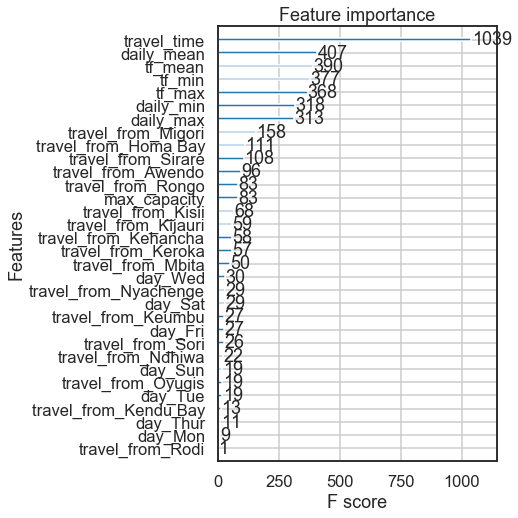

In [275]:
# Plotting the important features
from pylab import rcParams
rcParams['figure.figsize'] = 5, 8
plot_importance(xgb_model2)
plt.show()

# Learning curve

In [276]:
eval_set = [(train_v_X, train_v_y), (test_v_X, test_v_y)]
xgb_model2.fit(train_v_X, train_v_y, eval_metric="mae", eval_set=eval_set, verbose=True)

[0]	validation_0-mae:7.05344	validation_1-mae:7.0563
[1]	validation_0-mae:6.64662	validation_1-mae:6.63595
[2]	validation_0-mae:6.31154	validation_1-mae:6.29116
[3]	validation_0-mae:6.07714	validation_1-mae:6.03924
[4]	validation_0-mae:5.87409	validation_1-mae:5.82091
[5]	validation_0-mae:5.69075	validation_1-mae:5.63079
[6]	validation_0-mae:5.53831	validation_1-mae:5.47855
[7]	validation_0-mae:5.41402	validation_1-mae:5.35661
[8]	validation_0-mae:5.30595	validation_1-mae:5.25301
[9]	validation_0-mae:5.22323	validation_1-mae:5.16414
[10]	validation_0-mae:5.14042	validation_1-mae:5.09
[11]	validation_0-mae:5.08554	validation_1-mae:5.043
[12]	validation_0-mae:4.99209	validation_1-mae:4.94254
[13]	validation_0-mae:4.93622	validation_1-mae:4.87366
[14]	validation_0-mae:4.87291	validation_1-mae:4.80991
[15]	validation_0-mae:4.83332	validation_1-mae:4.77616
[16]	validation_0-mae:4.76855	validation_1-mae:4.70862
[17]	validation_0-mae:4.73376	validation_1-mae:4.66621
[18]	validation_0-mae:4.68

[149]	validation_0-mae:3.75691	validation_1-mae:3.89958
[150]	validation_0-mae:3.75508	validation_1-mae:3.8978
[151]	validation_0-mae:3.7502	validation_1-mae:3.89231
[152]	validation_0-mae:3.74781	validation_1-mae:3.8921
[153]	validation_0-mae:3.74315	validation_1-mae:3.89128
[154]	validation_0-mae:3.74184	validation_1-mae:3.89107
[155]	validation_0-mae:3.74079	validation_1-mae:3.89083
[156]	validation_0-mae:3.74093	validation_1-mae:3.89135
[157]	validation_0-mae:3.73989	validation_1-mae:3.89146
[158]	validation_0-mae:3.73786	validation_1-mae:3.8894
[159]	validation_0-mae:3.73573	validation_1-mae:3.88836
[160]	validation_0-mae:3.73122	validation_1-mae:3.88659
[161]	validation_0-mae:3.73053	validation_1-mae:3.88656
[162]	validation_0-mae:3.72935	validation_1-mae:3.88425
[163]	validation_0-mae:3.72867	validation_1-mae:3.88309
[164]	validation_0-mae:3.72642	validation_1-mae:3.88184
[165]	validation_0-mae:3.72538	validation_1-mae:3.88142
[166]	validation_0-mae:3.72424	validation_1-mae:3.88

[296]	validation_0-mae:3.47093	validation_1-mae:3.7494
[297]	validation_0-mae:3.46888	validation_1-mae:3.74868
[298]	validation_0-mae:3.46806	validation_1-mae:3.74516
[299]	validation_0-mae:3.46639	validation_1-mae:3.74336
[300]	validation_0-mae:3.46644	validation_1-mae:3.7432
[301]	validation_0-mae:3.46432	validation_1-mae:3.74059
[302]	validation_0-mae:3.46285	validation_1-mae:3.73978
[303]	validation_0-mae:3.46249	validation_1-mae:3.73999
[304]	validation_0-mae:3.46178	validation_1-mae:3.74036
[305]	validation_0-mae:3.461	validation_1-mae:3.73976
[306]	validation_0-mae:3.46022	validation_1-mae:3.73971
[307]	validation_0-mae:3.45882	validation_1-mae:3.74071
[308]	validation_0-mae:3.45744	validation_1-mae:3.74188
[309]	validation_0-mae:3.45584	validation_1-mae:3.742
[310]	validation_0-mae:3.45467	validation_1-mae:3.74156
[311]	validation_0-mae:3.45241	validation_1-mae:3.74176
[312]	validation_0-mae:3.44987	validation_1-mae:3.74149
[313]	validation_0-mae:3.44876	validation_1-mae:3.7401

[443]	validation_0-mae:3.3029	validation_1-mae:3.69415
[444]	validation_0-mae:3.30301	validation_1-mae:3.69562
[445]	validation_0-mae:3.30201	validation_1-mae:3.6951
[446]	validation_0-mae:3.30128	validation_1-mae:3.69558
[447]	validation_0-mae:3.29921	validation_1-mae:3.69524
[448]	validation_0-mae:3.29819	validation_1-mae:3.69497
[449]	validation_0-mae:3.2971	validation_1-mae:3.69415
[450]	validation_0-mae:3.29563	validation_1-mae:3.69387
[451]	validation_0-mae:3.29489	validation_1-mae:3.69093
[452]	validation_0-mae:3.29393	validation_1-mae:3.69046
[453]	validation_0-mae:3.2912	validation_1-mae:3.68862
[454]	validation_0-mae:3.2898	validation_1-mae:3.6878
[455]	validation_0-mae:3.28811	validation_1-mae:3.68627
[456]	validation_0-mae:3.28757	validation_1-mae:3.68593
[457]	validation_0-mae:3.28649	validation_1-mae:3.68634
[458]	validation_0-mae:3.28614	validation_1-mae:3.68648
[459]	validation_0-mae:3.28548	validation_1-mae:3.68682
[460]	validation_0-mae:3.28557	validation_1-mae:3.6880

[591]	validation_0-mae:3.17332	validation_1-mae:3.68227
[592]	validation_0-mae:3.17095	validation_1-mae:3.67982
[593]	validation_0-mae:3.16991	validation_1-mae:3.68029
[594]	validation_0-mae:3.16918	validation_1-mae:3.6811
[595]	validation_0-mae:3.16745	validation_1-mae:3.68051
[596]	validation_0-mae:3.1669	validation_1-mae:3.6795
[597]	validation_0-mae:3.16586	validation_1-mae:3.67996
[598]	validation_0-mae:3.16572	validation_1-mae:3.67994
[599]	validation_0-mae:3.165	validation_1-mae:3.68064
[600]	validation_0-mae:3.16483	validation_1-mae:3.68123
[601]	validation_0-mae:3.16392	validation_1-mae:3.68095
[602]	validation_0-mae:3.1631	validation_1-mae:3.68114
[603]	validation_0-mae:3.16221	validation_1-mae:3.68061
[604]	validation_0-mae:3.1619	validation_1-mae:3.67992
[605]	validation_0-mae:3.16161	validation_1-mae:3.68055
[606]	validation_0-mae:3.16045	validation_1-mae:3.68017
[607]	validation_0-mae:3.15918	validation_1-mae:3.68095
[608]	validation_0-mae:3.15864	validation_1-mae:3.68146

[738]	validation_0-mae:3.06742	validation_1-mae:3.67372
[739]	validation_0-mae:3.06708	validation_1-mae:3.67365
[740]	validation_0-mae:3.06647	validation_1-mae:3.67621
[741]	validation_0-mae:3.06595	validation_1-mae:3.67602
[742]	validation_0-mae:3.06477	validation_1-mae:3.67545
[743]	validation_0-mae:3.06437	validation_1-mae:3.67543
[744]	validation_0-mae:3.06355	validation_1-mae:3.67494
[745]	validation_0-mae:3.06263	validation_1-mae:3.67364
[746]	validation_0-mae:3.06181	validation_1-mae:3.6732
[747]	validation_0-mae:3.05829	validation_1-mae:3.66539
[748]	validation_0-mae:3.05688	validation_1-mae:3.66589
[749]	validation_0-mae:3.05594	validation_1-mae:3.66623
[750]	validation_0-mae:3.05524	validation_1-mae:3.66588
[751]	validation_0-mae:3.0547	validation_1-mae:3.66493
[752]	validation_0-mae:3.05398	validation_1-mae:3.66441
[753]	validation_0-mae:3.05322	validation_1-mae:3.6635
[754]	validation_0-mae:3.05253	validation_1-mae:3.6644
[755]	validation_0-mae:3.05234	validation_1-mae:3.66

[885]	validation_0-mae:2.97799	validation_1-mae:3.6433
[886]	validation_0-mae:2.9776	validation_1-mae:3.64343
[887]	validation_0-mae:2.97758	validation_1-mae:3.64418
[888]	validation_0-mae:2.97708	validation_1-mae:3.64552
[889]	validation_0-mae:2.97669	validation_1-mae:3.64573
[890]	validation_0-mae:2.97602	validation_1-mae:3.64559
[891]	validation_0-mae:2.97603	validation_1-mae:3.64568
[892]	validation_0-mae:2.97553	validation_1-mae:3.64541
[893]	validation_0-mae:2.97568	validation_1-mae:3.64581
[894]	validation_0-mae:2.97534	validation_1-mae:3.6455
[895]	validation_0-mae:2.97453	validation_1-mae:3.64471
[896]	validation_0-mae:2.97383	validation_1-mae:3.64372
[897]	validation_0-mae:2.97301	validation_1-mae:3.64371
[898]	validation_0-mae:2.97287	validation_1-mae:3.64356
[899]	validation_0-mae:2.9721	validation_1-mae:3.64288
[900]	validation_0-mae:2.97158	validation_1-mae:3.64313
[901]	validation_0-mae:2.97113	validation_1-mae:3.64215
[902]	validation_0-mae:2.96977	validation_1-mae:3.64

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, criterion='mae', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [277]:
# Generates the results validation_0  is the first eval set ie train and validation 1 is the second ie test
results = xgb_model2.evals_result()
# results['validation_0']['mae']
# results['validation_1']['mae']

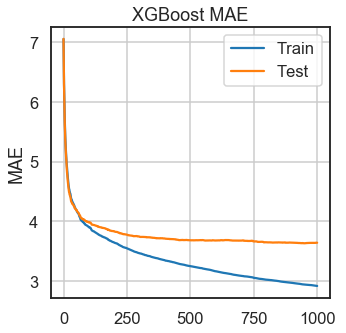

In [278]:
# retrieve performance metrics
results = xgb_model2.evals_result()
epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)
# plot log loss
rcParams['figure.figsize'] = 5, 5
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
plt.ylabel('MAE')

plt.title('XGBoost MAE')
plt.show()

# Adjusting some parameters

## learning rate

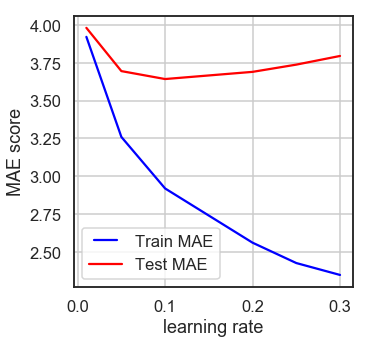

In [183]:
learning_rates = [ 0.3, 0.25, 0.2, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
    model = XGBRegressor(learning_rate=eta, n_estimators=1000)
    model.fit(train_v_X, train_v_y)
    train_pred = model.predict(train_v_X)
    my_train_mae = mean_absolute_error(train_pred, train_v_y)
    train_results.append(my_train_mae)
    y_pred = model.predict(test_v_X)
    my_test_mae = mean_absolute_error(y_pred, test_v_y)
    test_results.append(my_test_mae)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label='Train MAE')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('learning rate')
plt.show()
# Learning rate of 0.5 is optimal

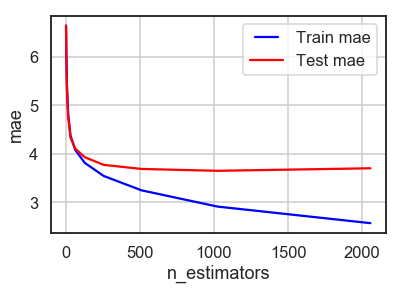

In [267]:
# estimators we want to try
n_estimators = [2,4,8,16,32,64,128,256,512, 1024, 2056]
# empty list for results
train_results = []
test_results = []
# for loop to fit the rf regressor to each n_estimator, generate a training and testing score
for estimator in n_estimators:
    model = XGBRegressor(n_estimators=estimator, n_jobs=-1, learning_rate=0.1)
    model.fit(train_v_X, train_v_y)
    train_pred = model.predict(train_v_X)
    my_train_mae = mean_absolute_error(train_v_y, train_pred)
    train_results.append(my_train_mae)
    y_pred =model.predict(test_v_X)
    my_test_mae = mean_absolute_error(test_v_y, y_pred)
    test_results.append(my_test_mae)
# Plot the results
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train mae')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test mae')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mae')
plt.xlabel('n_estimators')
plt.show()

# hard to say if it matters much but 90 looks good

# early stopping rounds

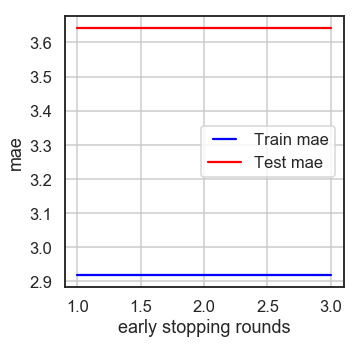

In [172]:
# estimators we want to try
early_stopping_rnds = [ 1,2,3]
# empty list for results
train_results = []
test_results = []
# for loop to fit the rf regressor to each n_estimator, generate a training and testing score
for rounds in early_stopping_rnds:
    model = XGBRegressor(early_stopping_rounds=rounds, n_jobs=-1, learning_rate=0.1, n_estimators=1000)
    model.fit(train_v_X, train_v_y)
    train_pred = model.predict(train_v_X)
    my_train_mae = mean_absolute_error(train_v_y, train_pred)
    train_results.append(my_train_mae)
    y_pred =model.predict(test_v_X)
    my_test_mae = mean_absolute_error(test_v_y, y_pred)
    test_results.append(my_test_mae)
# Plot the results
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(early_stopping_rnds, train_results, 'b', label='Train mae')
line2, = plt.plot(early_stopping_rnds, test_results, 'r', label='Test mae')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mae')
plt.xlabel('early stopping rounds')
plt.show()
# In this case it makes no difference- why is this does it stop after 1 round?

# max_depth

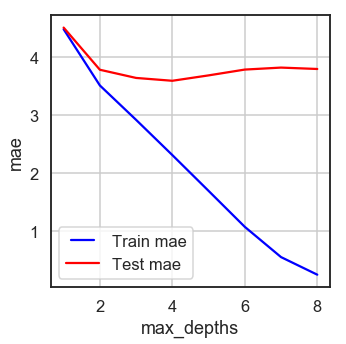

In [185]:
# max_depths we want to try
max_depths = [1,2,3,4,5,6,7,8]
# empty list for results
train_results = []
test_results = []
# for loop to fit the rf regressor to each depth, generate a training and testing score
for depths in max_depths:
    model = XGBRegressor(max_depth=depths, n_jobs=-1, learning_rate=0.1, n_estimators=1000)
    model.fit(train_v_X, train_v_y)
    train_pred = model.predict(train_v_X)
    my_train_mae = mean_absolute_error(train_v_y, train_pred)
    train_results.append(my_train_mae)
    y_pred =model.predict(test_v_X)
    my_test_mae = mean_absolute_error(test_v_y, y_pred)
    test_results.append(my_test_mae)
# Plot the results
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train mae')
line2, = plt.plot(max_depths, test_results, 'r', label='Test mae')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mae')
plt.xlabel('max_depths')
plt.show()

# Looks like 3 does a good job

In [174]:
# Subsample

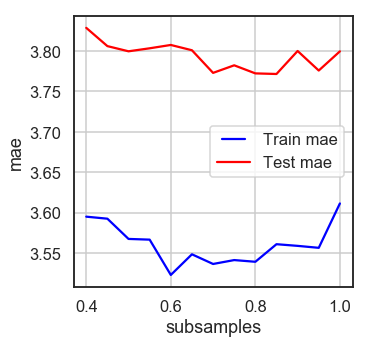

In [186]:
# max_depths we want to try
samples = [ 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
# empty list for results
train_results = []
test_results = []
# for loop to fit the rf regressor to each depth, generate a training and testing score
for sample in samples:
    model = XGBRegressor(subsample=sample, n_jobs=-1, learning_rate=0.1, max_depth=4, n_estimator=1000)
    model.fit(train_v_X, train_v_y )
    train_pred = model.predict(train_v_X)
    my_train_mae = mean_absolute_error(train_v_y, train_pred)
    train_results.append(my_train_mae)
    y_pred =model.predict(test_v_X)
    my_test_mae = mean_absolute_error(test_v_y, y_pred)
    test_results.append(my_test_mae)
# Plot the results
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(samples, train_results, 'b', label='Train mae')
line2, = plt.plot(samples, test_results, 'r', label='Test mae')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mae')
plt.xlabel('subsamples')
plt.show()

# Looks like 1 does a good job

# gamma

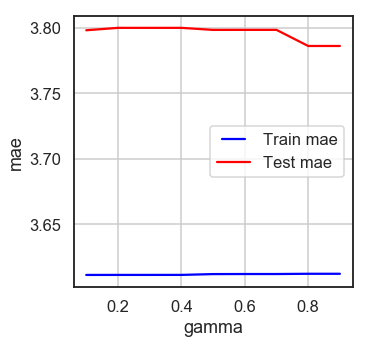

In [187]:
# max_depths we want to try
gammas = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# empty list for results
train_results = []
test_results = []
# for loop to fit the rf regressor to each depth, generate a training and testing score
for gams in gammas:
    model = XGBRegressor(gamma=gams, n_jobs=-1, learning_rate=0.1, max_depth=4, n_estimator=1000)
    model.fit(train_v_X, train_v_y)
    train_pred = model.predict(train_v_X)
    my_train_mae = mean_absolute_error(train_v_y, train_pred)
    train_results.append(my_train_mae)
    y_pred =model.predict(test_v_X)
    my_test_mae = mean_absolute_error(test_v_y, y_pred)
    test_results.append(my_test_mae)
# Plot the results
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(gammas, train_results, 'b', label='Train mae')
line2, = plt.plot(gammas, test_results, 'r', label='Test mae')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mae')
plt.xlabel('gamma')
plt.show()

# Looks like 1 does a good job

# Giving up on this approach which seems to yield just below 4 regardless of sensible parameters

# Building a second model using results from above

In [292]:
xgb_model3 = XGBRegressor(random_state=1, criterion ='mae', max_depth=4, learning_rate=0.1, n_estimators=1000, subsamples = 0.6)
eval_set =[(test_v_X, test_v_y)]
xgb_model3.fit(train_v_X, train_v_y, eval_metric="mae", eval_set=eval_set, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, criterion='mae', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, subsamples=0.6)

In [293]:
# make predictions for test data
xgb_model3_y_pred = xgb_model3.predict(test_v_X)

In [294]:
print('MAE:',mean_absolute_error(test_v_y, xgb_model3_y_pred))
print('train score / test score:',model.score( train_v_X , train_v_y ), model.score( test_v_X , test_v_y ))

MAE: 3.593663140010834
train score / test score: 0.8068027862165544 0.5700234291689584


In [280]:
# Building a cross validation grid
## First n_estimatros and max_depth

In [308]:
#setting the hyperparameters to  use in the gridsearch
# Format for setting hperparamets is using a python dictionary with the hyperparamter names given and the  teh balues are lists
# of settings to try
hyperparameters = { 'n_estimators':[400, 450, 500, 550, 600],
                    # maximum depth of the tree
                    'max_depth': [3,4,5],
#                     'learning_rate':[0.1, 0.2, 0.3], # aka laerning rate
#                    'subsample': [0.5, 0.6, 0.7, 0.8]
                    }

In [309]:
xgb_model4 = XGBRegressor(random_state=42, criterion ='mae', n_jobs=-1)

In [310]:
# Create randomized search 10-fold cross validation 
gscv = GridSearchCV(xgb_model4, hyperparameters, cv=10, verbose=0, n_jobs=-1, scoring = 'neg_mean_absolute_error')

In [311]:
# Fit randomized search
xgb_model5 = gscv.fit(train_v_X, train_v_y)

In [312]:
print('Best parameter', xgb_model5.best_estimator_.get_params())

Best parameter {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 400, 'n_jobs': -1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1, 'criterion': 'mae'}


In [313]:
# summarize results
print("Best: %f using %s" % (xgb_model5.best_score_, xgb_model5.best_params_))
means = xgb_model5.cv_results_['mean_test_score']
stds = xgb_model5.cv_results_['std_test_score']
params = xgb_model5.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -3.773563 using {'max_depth': 5, 'n_estimators': 400}
-3.817590 (0.187886) with: {'max_depth': 3, 'n_estimators': 400}
-3.802470 (0.189504) with: {'max_depth': 3, 'n_estimators': 450}
-3.795110 (0.189504) with: {'max_depth': 3, 'n_estimators': 500}
-3.787465 (0.186121) with: {'max_depth': 3, 'n_estimators': 550}
-3.783044 (0.183144) with: {'max_depth': 3, 'n_estimators': 600}
-3.779268 (0.191931) with: {'max_depth': 4, 'n_estimators': 400}
-3.782374 (0.196690) with: {'max_depth': 4, 'n_estimators': 450}
-3.782730 (0.193696) with: {'max_depth': 4, 'n_estimators': 500}
-3.790320 (0.185984) with: {'max_depth': 4, 'n_estimators': 550}
-3.798308 (0.182147) with: {'max_depth': 4, 'n_estimators': 600}
-3.773563 (0.178999) with: {'max_depth': 5, 'n_estimators': 400}
-3.788396 (0.176937) with: {'max_depth': 5, 'n_estimators': 450}
-3.805192 (0.173410) with: {'max_depth': 5, 'n_estimators': 500}
-3.818123 (0.175445) with: {'max_depth': 5, 'n_estimators': 550}
-3.830318 (0.172148) with: {'m

In [315]:
# Predict training set results
xgb_model5_v_train_preds = xgb_model5.predict(train_v_X)

In [316]:
# Compare the predctions with the validation test results ie test_v_y
print ('mae between validation results and validation test data:',mean_absolute_error(xgb_model5_v_train_preds, train_v_y))
# generated score - level of accuracy but not sure how its measured
print ('validation test score:', xgb_model5.score( train_v_X , train_v_y ))

mae between validation results and validation test data: 2.463204983241035
validation test score: -2.463204983241035


In [317]:
# Now run the model on the validation set 
xgb_model5_v_test_preds = xgb_model5.predict(test_v_X)

In [318]:
# print('Model 5: mae on validation data', mean_absolute_error(forest_model5_y_pred, test_v_y))
# print ('Model 5: train score / test score', forest_model5.score( train_v_X , train_v_y ) , forest_model5.score( test_v_X , test_v_y ))
# Model 4 is just a blank canvas to enter into the cross validation randomiser
print('Model 5: mae on validation train data', mean_absolute_error(xgb_model5_v_train_preds, train_v_y))
print('Model 5: mae on validation test data', mean_absolute_error(xgb_model5_v_test_preds, test_v_y))
print ('Model 5: train score / test score', xgb_model5.score( train_v_X , train_v_y ) , xgb_model5.score( test_v_X , test_v_y ))

Model 5: mae on validation train data 2.463204983241035
Model 5: mae on validation test data 3.60971100461483
Model 5: train score / test score -2.463204983241035 -3.60971100461483


## Fit learning rate and number of estimators - model 6

In [319]:
#setting the hyperparameters to  use in the gridsearch
# Format for setting hperparamets is using a python dictionary with the hyperparamter names given and the  teh balues are lists
# of settings to try
hyperparameters = { 'n_estimators':[400, 450, 500, 550, 600],
                    'max_depth': [5],
                    'learning_rate':[0.05, 0.1, 0.2, 0.3], # aka laerning rate
#                    'subsample': [0.5, 0.6, 0.7, 0.8]
                    }

In [320]:
xgb_model4 = XGBRegressor(random_state=42, criterion ='mae', n_jobs=-1, max_depth=5)

In [321]:
# Create randomized search 10-fold cross validation 
gscv = GridSearchCV(xgb_model4, hyperparameters, cv=10, verbose=0, n_jobs=-1, scoring = 'neg_mean_absolute_error')

In [322]:
# Fit grid search
xgb_model6 = gscv.fit(train_v_X, train_v_y)

In [323]:
print('Best parameter', xgb_model6.best_estimator_.get_params())

Best parameter {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.05, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 550, 'n_jobs': -1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1, 'criterion': 'mae'}


In [324]:
# summarize results
print("Best: %f using %s" % (xgb_model6.best_score_, xgb_model6.best_params_))
means = xgb_model6.cv_results_['mean_test_score']
stds = xgb_model6.cv_results_['std_test_score']
params = xgb_model6.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -3.743544 using {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 550}
-3.767799 (0.178611) with: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 400}
-3.758280 (0.177439) with: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 450}
-3.749252 (0.179697) with: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500}
-3.743544 (0.180534) with: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 550}
-3.744982 (0.177965) with: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 600}
-3.773563 (0.178999) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}
-3.788396 (0.176937) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 450}
-3.805192 (0.173410) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
-3.818123 (0.175445) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 550}
-3.830318 (0.172148) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 600}
-3.897710 (0.162700) with: {'learning_rate

In [325]:
# Predict training set results
xgb_model6_v_train_preds = xgb_model6.predict(train_v_X)

In [326]:
# Compare the predctions with the validation test results ie test_v_y
print ('mae between validation results and validation test data:',mean_absolute_error(xgb_model6_v_train_preds, train_v_y))
# generated score - level of accuracy but not sure how its measured
print ('validation test score:', xgb_model6.score( train_v_X , train_v_y ))

mae between validation results and validation test data: 2.7559587983077325
validation test score: -2.7559587983077325


In [327]:
# Now run the model on the validation set 
xgb_model6_v_test_preds = xgb_model6.predict(test_v_X)

In [328]:
# print('Model 5: mae on validation data', mean_absolute_error(forest_model5_y_pred, test_v_y))
# print ('Model 5: train score / test score', forest_model5.score( train_v_X , train_v_y ) , forest_model5.score( test_v_X , test_v_y ))
# Model 4 is just a blank canvas to enter into the cross validation randomiser
print('Model 5: mae on validation train data', mean_absolute_error(xgb_model5_v_train_preds, train_v_y))
print('Model 5: mae on validation test data', mean_absolute_error(xgb_model5_v_test_preds, test_v_y))
print ('Model 5: train score / test score', xgb_model5.score( train_v_X , train_v_y ) , xgb_model5.score( test_v_X , test_v_y ))
print('Model 6: mae on validation train data', mean_absolute_error(xgb_model6_v_train_preds, train_v_y))
print('Model 6: mae on validation test data', mean_absolute_error(xgb_model6_v_test_preds, test_v_y))
print ('Model 6: train score / test score', xgb_model6.score( train_v_X , train_v_y ) , xgb_model6.score( test_v_X , test_v_y ))

Model 5: mae on validation train data 2.463204983241035
Model 5: mae on validation test data 3.60971100461483
Model 5: train score / test score -2.463204983241035 -3.60971100461483
Model 6: mae on validation train data 2.7559587983077325
Model 6: mae on validation test data 3.6013063652992248
Model 6: train score / test score -2.7559587983077325 -3.6013063652992248


## max depth and min child weight - model 7

In [339]:
#setting the hyperparameters to  use in the gridsearch
# Format for setting hperparamets is using a python dictionary with the hyperparamter names given and the  teh balues are lists
# of settings to try
hyperparameters = { 'n_estimators':[550],
                    'learning_rate':[0.05], # aka laerning rate
#                     'max_depth':range(3,10,2),
                   'max_depth':(4,5,6),
#                      'min_child_weight':range(1,6,2)
                   'min_child_weight':(1,2,3)
#                    'subsample': [0.5, 0.6, 0.7, 0.8]
                    }

In [340]:
xgb_model4 = XGBRegressor(random_state=42, criterion ='mae', n_jobs=-1, max_depth=5)

In [341]:
# Create randomized search 10-fold cross validation 
gscv = GridSearchCV(xgb_model4, hyperparameters, cv=10, verbose=0, n_jobs=-1, scoring = 'neg_mean_absolute_error')

In [342]:
# Fit grid search
xgb_model7 = gscv.fit(train_v_X, train_v_y)

In [343]:
print('Best parameter', xgb_model7.best_estimator_.get_params())

Best parameter {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.05, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 550, 'n_jobs': -1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1, 'criterion': 'mae'}


In [344]:
# summarize results
print("Best: %f using %s" % (xgb_model7.best_score_, xgb_model7.best_params_))
means = xgb_model7.cv_results_['mean_test_score']
stds = xgb_model7.cv_results_['std_test_score']
params = xgb_model7.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -3.743544 using {'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 550}
-3.793136 (0.183527) with: {'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 550}
-3.793130 (0.178845) with: {'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 550}
-3.781303 (0.188218) with: {'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 550}
-3.743544 (0.180534) with: {'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 550}
-3.753372 (0.183012) with: {'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 550}
-3.750311 (0.180656) with: {'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 550}
-3.790880 (0.177579) with: {'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 550}
-3.799575 (0.204881) with: {'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 550}
-3.793

In [345]:
# Predict training set results
xgb_model7_v_train_preds = xgb_model7.predict(train_v_X)

In [346]:
# Compare the predctions with the validation test results ie test_v_y
print ('mae between validation results and validation test data:',mean_absolute_error(xgb_model7_v_train_preds, train_v_y))
# generated score - level of accuracy but not sure how its measured
print ('validation test score:', xgb_model7.score( train_v_X , train_v_y ))

mae between validation results and validation test data: 2.7559587983077325
validation test score: -2.7559587983077325


In [347]:
# Now run the model on the validation set 
xgb_model7_v_test_preds = xgb_model7.predict(test_v_X)

In [348]:
# print('Model 5: mae on validation data', mean_absolute_error(forest_model5_y_pred, test_v_y))
# print ('Model 5: train score / test score', forest_model5.score( train_v_X , train_v_y ) , forest_model5.score( test_v_X , test_v_y ))
# Model 4 is just a blank canvas to enter into the cross validation randomiser
print('Model 5: mae on validation train data', mean_absolute_error(xgb_model5_v_train_preds, train_v_y))
print('Model 5: mae on validation test data', mean_absolute_error(xgb_model5_v_test_preds, test_v_y))
print ('Model 5: train score / test score', xgb_model5.score( train_v_X , train_v_y ) , xgb_model5.score( test_v_X , test_v_y ))
print('Model 6: mae on validation train data', mean_absolute_error(xgb_model6_v_train_preds, train_v_y))
print('Model 6: mae on validation test data', mean_absolute_error(xgb_model6_v_test_preds, test_v_y))
print ('Model 6: train score / test score', xgb_model6.score( train_v_X , train_v_y ) , xgb_model6.score( test_v_X , test_v_y ))
print('Model 7: mae on validation train data', mean_absolute_error(xgb_model7_v_train_preds, train_v_y))
print('Model 7: mae on validation test data', mean_absolute_error(xgb_model7_v_test_preds, test_v_y))
print ('Model 7: train score / test score', xgb_model7.score( train_v_X , train_v_y ) , xgb_model7.score( test_v_X , test_v_y ))

Model 5: mae on validation train data 2.463204983241035
Model 5: mae on validation test data 3.60971100461483
Model 5: train score / test score -2.463204983241035 -3.60971100461483
Model 6: mae on validation train data 2.7559587983077325
Model 6: mae on validation test data 3.6013063652992248
Model 6: train score / test score -2.7559587983077325 -3.6013063652992248
Model 7: mae on validation train data 2.7559587983077325
Model 7: mae on validation test data 3.6013063652992248
Model 7: train score / test score -2.7559587983077325 -3.6013063652992248


## gamma - model 8

In [355]:
#setting the hyperparameters to  use in the gridsearch
# Format for setting hperparamets is using a python dictionary with the hyperparamter names given and the  teh balues are lists
# of settings to try
hyperparameters = { 'n_estimators':[550],
                   'learning_rate':[0.05],
                   'max_depth':[5],
                   'min_child_weight':[1],
                   'gamma':[i/10.0 for i in range(0,5)]
                    }

In [356]:
xgb_model4 = XGBRegressor(random_state=42, criterion ='mae', n_jobs=-1, max_depth=5)

In [357]:
# Create randomized search 10-fold cross validation 
gscv = GridSearchCV(xgb_model4, hyperparameters, cv=10, verbose=0, n_jobs=-1, scoring = 'neg_mean_absolute_error')

In [358]:
# Fit grid search
xgb_model8 = gscv.fit(train_v_X, train_v_y)

In [359]:
print('Best parameter', xgb_model8.best_estimator_.get_params())

Best parameter {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0.0, 'learning_rate': 0.05, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 550, 'n_jobs': -1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1, 'criterion': 'mae'}


In [360]:
# summarize results
print("Best: %f using %s" % (xgb_model8.best_score_, xgb_model8.best_params_))
means = xgb_model8.cv_results_['mean_test_score']
stds = xgb_model8.cv_results_['std_test_score']
params = xgb_model8.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -3.743544 using {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 550}
-3.743544 (0.180534) with: {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 550}
-3.755557 (0.182413) with: {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 550}
-3.760122 (0.182484) with: {'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 550}
-3.752028 (0.183933) with: {'gamma': 0.3, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 550}
-3.766652 (0.185135) with: {'gamma': 0.4, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 550}


In [361]:
# Predict training set results
xgb_model8_v_train_preds = xgb_model8.predict(train_v_X)

In [362]:
# Compare the predctions with the validation test results ie test_v_y
print ('mae between validation results and validation test data:',mean_absolute_error(xgb_model8_v_train_preds, train_v_y))
# generated score - level of accuracy but not sure how its measured
print ('validation test score:', xgb_model8.score( train_v_X , train_v_y ))

mae between validation results and validation test data: 2.7559587983077325
validation test score: -2.7559587983077325


In [363]:
# Now run the model on the validation set 
xgb_model8_v_test_preds = xgb_model8.predict(test_v_X)

In [364]:
# print('Model 5: mae on validation data', mean_absolute_error(forest_model5_y_pred, test_v_y))
# print ('Model 5: train score / test score', forest_model5.score( train_v_X , train_v_y ) , forest_model5.score( test_v_X , test_v_y ))
# Model 4 is just a blank canvas to enter into the cross validation randomiser
print('Model 5: mae on validation train data', mean_absolute_error(xgb_model5_v_train_preds, train_v_y))
print('Model 5: mae on validation test data', mean_absolute_error(xgb_model5_v_test_preds, test_v_y))
print ('Model 5: train score / test score', xgb_model5.score( train_v_X , train_v_y ) , xgb_model5.score( test_v_X , test_v_y ))
print('Model 6: mae on validation train data', mean_absolute_error(xgb_model6_v_train_preds, train_v_y))
print('Model 6: mae on validation test data', mean_absolute_error(xgb_model6_v_test_preds, test_v_y))
print ('Model 6: train score / test score', xgb_model6.score( train_v_X , train_v_y ) , xgb_model6.score( test_v_X , test_v_y ))
print('Model 7: mae on validation train data', mean_absolute_error(xgb_model7_v_train_preds, train_v_y))
print('Model 7: mae on validation test data', mean_absolute_error(xgb_model7_v_test_preds, test_v_y))
print ('Model 7: train score / test score', xgb_model7.score( train_v_X , train_v_y ) , xgb_model7.score( test_v_X , test_v_y ))
print('Model 8: mae on validation train data', mean_absolute_error(xgb_model8_v_train_preds, train_v_y))
print('Model 8: mae on validation test data', mean_absolute_error(xgb_model8_v_test_preds, test_v_y))
print ('Model 8: train score / test score', xgb_model8.score( train_v_X , train_v_y ) , xgb_model8.score( test_v_X , test_v_y ))

Model 5: mae on validation train data 2.463204983241035
Model 5: mae on validation test data 3.60971100461483
Model 5: train score / test score -2.463204983241035 -3.60971100461483
Model 6: mae on validation train data 2.7559587983077325
Model 6: mae on validation test data 3.6013063652992248
Model 6: train score / test score -2.7559587983077325 -3.6013063652992248
Model 7: mae on validation train data 2.7559587983077325
Model 7: mae on validation test data 3.6013063652992248
Model 7: train score / test score -2.7559587983077325 -3.6013063652992248
Model 8: mae on validation train data 2.7559587983077325
Model 8: mae on validation test data 3.6013063652992248
Model 8: train score / test score -2.7559587983077325 -3.6013063652992248


# subsamples model 9

In [385]:
#setting the hyperparameters to  use in the gridsearch
# Format for setting hperparamets is using a python dictionary with the hyperparamter names given and the  teh balues are lists
# of settings to try
hyperparameters = { 'n_estimators':[550],
                   'learning_rate':[0.05],
                   'subsample':[i/100.0 for i in range(60,110,10)],
                   'colsample_bytree':[i/100.0 for i in range(75,105,5)]
                    }

In [386]:
xgb_model4 = XGBRegressor(random_state=42, criterion ='mae', n_jobs=-1, max_depth=5, min_child_weight=1, gamma=0)

In [387]:
# Create randomized search 10-fold cross validation 
gscv = GridSearchCV(xgb_model4, hyperparameters, cv=10, verbose=0, n_jobs=-1, scoring = 'neg_mean_absolute_error')

In [388]:
# Fit grid search
xgb_model9 = gscv.fit(train_v_X, train_v_y)

In [389]:
print('Best parameter', xgb_model9.best_estimator_.get_params())

Best parameter {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 550, 'n_jobs': -1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1.0, 'criterion': 'mae'}


In [390]:
# summarize results
print("Best: %f using %s" % (xgb_model9.best_score_, xgb_model8.best_params_))
means = xgb_model9.cv_results_['mean_test_score']
stds = xgb_model9.cv_results_['std_test_score']
params = xgb_model9.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -3.743544 using {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 550}
-3.822976 (0.194571) with: {'colsample_bytree': 0.75, 'learning_rate': 0.05, 'n_estimators': 550, 'subsample': 0.6}
-3.799573 (0.196897) with: {'colsample_bytree': 0.75, 'learning_rate': 0.05, 'n_estimators': 550, 'subsample': 0.7}
-3.797350 (0.181673) with: {'colsample_bytree': 0.75, 'learning_rate': 0.05, 'n_estimators': 550, 'subsample': 0.8}
-3.776874 (0.181178) with: {'colsample_bytree': 0.75, 'learning_rate': 0.05, 'n_estimators': 550, 'subsample': 0.9}
-3.769044 (0.188191) with: {'colsample_bytree': 0.75, 'learning_rate': 0.05, 'n_estimators': 550, 'subsample': 1.0}
-3.827202 (0.191089) with: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'n_estimators': 550, 'subsample': 0.6}
-3.802839 (0.185132) with: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'n_estimators': 550, 'subsample': 0.7}
-3.781423 (0.199378) with: {'colsample_bytree': 0.8, 'learning_rate': 

In [391]:
# Predict training set results
xgb_model9_v_train_preds = xgb_model9.predict(train_v_X)

In [392]:
# Compare the predctions with the validation test results ie test_v_y
print ('mae between validation results and validation test data:',mean_absolute_error(xgb_model9_v_train_preds, train_v_y))
# generated score - level of accuracy but not sure how its measured
print ('validation test score:', xgb_model9.score( train_v_X , train_v_y ))

mae between validation results and validation test data: 2.7559587983077325
validation test score: -2.7559587983077325


In [393]:
# Now run the model on the validation set 
xgb_model9_v_test_preds = xgb_model9.predict(test_v_X)

In [394]:
# print('Model 5: mae on validation data', mean_absolute_error(forest_model5_y_pred, test_v_y))
# print ('Model 5: train score / test score', forest_model5.score( train_v_X , train_v_y ) , forest_model5.score( test_v_X , test_v_y ))
# Model 4 is just a blank canvas to enter into the cross validation randomiser
print('Model 5: mae on validation train data', mean_absolute_error(xgb_model5_v_train_preds, train_v_y))
print('Model 5: mae on validation test data', mean_absolute_error(xgb_model5_v_test_preds, test_v_y))
print ('Model 5: train score / test score', xgb_model5.score( train_v_X , train_v_y ) , xgb_model5.score( test_v_X , test_v_y ))
print('Model 6: mae on validation train data', mean_absolute_error(xgb_model6_v_train_preds, train_v_y))
print('Model 6: mae on validation test data', mean_absolute_error(xgb_model6_v_test_preds, test_v_y))
print ('Model 6: train score / test score', xgb_model6.score( train_v_X , train_v_y ) , xgb_model6.score( test_v_X , test_v_y ))
print('Model 7: mae on validation train data', mean_absolute_error(xgb_model7_v_train_preds, train_v_y))
print('Model 7: mae on validation test data', mean_absolute_error(xgb_model7_v_test_preds, test_v_y))
print ('Model 7: train score / test score', xgb_model7.score( train_v_X , train_v_y ) , xgb_model7.score( test_v_X , test_v_y ))
print('Model 8: mae on validation train data', mean_absolute_error(xgb_model8_v_train_preds, train_v_y))
print('Model 8: mae on validation test data', mean_absolute_error(xgb_model8_v_test_preds, test_v_y))
print ('Model 8: train score / test score', xgb_model8.score( train_v_X , train_v_y ) , xgb_model8.score( test_v_X , test_v_y ))
print('Model 9: mae on validation train data', mean_absolute_error(xgb_model9_v_train_preds, train_v_y))
print('Model 9: mae on validation test data', mean_absolute_error(xgb_model9_v_test_preds, test_v_y))
print ('Model 9: train score / test score', xgb_model9.score( train_v_X , train_v_y ) , xgb_model9.score( test_v_X , test_v_y ))

Model 5: mae on validation train data 2.463204983241035
Model 5: mae on validation test data 3.60971100461483
Model 5: train score / test score -2.463204983241035 -3.60971100461483
Model 6: mae on validation train data 2.7559587983077325
Model 6: mae on validation test data 3.6013063652992248
Model 6: train score / test score -2.7559587983077325 -3.6013063652992248
Model 7: mae on validation train data 2.7559587983077325
Model 7: mae on validation test data 3.6013063652992248
Model 7: train score / test score -2.7559587983077325 -3.6013063652992248
Model 8: mae on validation train data 2.7559587983077325
Model 8: mae on validation test data 3.6013063652992248
Model 8: train score / test score -2.7559587983077325 -3.6013063652992248
Model 9: mae on validation train data 2.7559587983077325
Model 9: mae on validation test data 3.6013063652992248
Model 9: train score / test score -2.7559587983077325 -3.6013063652992248


# Running on Zindi test set model 5

In [295]:
# Running on the final Zindi set
# Run the model on the test set 
xgb_model5_pred_y = xgb_model5.predict(test_X)

In [296]:
# creating the csv
submission_data = {'ride_id': ride_id_df, 'number_of_ticket': xgb_model5_pred_y}
submission_data = pd.DataFrame(data=submission_data)
submission_data = submission_data[['ride_id','number_of_ticket']]
submission_data.head()

,ride_id,number_of_ticket
6249,13856,21.369114
6250,13857,5.239019
6251,13847,3.656781
6252,13859,8.696256
6253,13855,7.556907


In [297]:
submission_data.to_csv('nairobi_uber_xgb_5.csv', index=False) #save to csv file

In [295]:
# Running on the final Zindi set
# Run the model on the test set 
xgb_model5_pred_y = xgb_model5.predict(test_X)

In [296]:
# creating the csv
submission_data = {'ride_id': ride_id_df, 'number_of_ticket': xgb_model5_pred_y}
submission_data = pd.DataFrame(data=submission_data)
submission_data = submission_data[['ride_id','number_of_ticket']]
submission_data.head()

,ride_id,number_of_ticket
6249,13856,21.369114
6250,13857,5.239019
6251,13847,3.656781
6252,13859,8.696256
6253,13855,7.556907


In [297]:
submission_data.to_csv('nairobi_uber_xgb_5.csv', index=False) #save to csv file

# Playing around with a few new tricks, not finished

## More formally defined xgboost

In [206]:
dtrain = xgb.DMatrix(train_v_X, label=train_v_y)
dtest = xgb.DMatrix(test_v_X, label=test_v_y)

In [207]:
# Setting the parameters to explore
params = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.5,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
}
modelcv = xgb.cv( dtrain = dtrain, params=params, nfold=10, metrics='mae', num_boost_round=10)
print((modelcv["test-mae-mean"]).tail(5))

5    4.301142
6    4.236344
7    4.183355
8    4.127606
9    4.105452
Name: test-mae-mean, dtype: float64


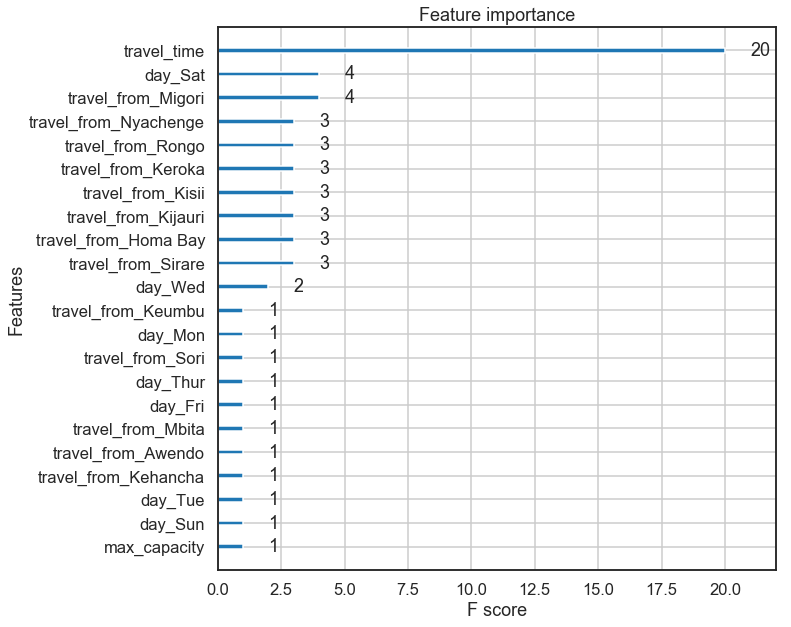

In [210]:
xg_reg = xgb.train(params=params, dtrain=dtrain, num_boost_round=10)
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [200, 10]
plt.show()

# Playing with setting up a pipeline 

In [395]:
# Creating the pipeline - in this case it only has one 
pipeline = make_pipeline(XGBRegressor(random_state=1, criterion ='mae'))

In [396]:
pipeline.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
     steps=[('xgbregressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, criterion='mae', gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1))])>

In [397]:
#setting the hyperparameters to  use in the gridsearch
# Format for setting hperparamets is using a python dictionary with the hyperparamter names given and the  teh balues are lists
# of settings to try
hyperparameters = { # maximum depth of the tree
                    'xgbregressor__max_depth': [2,3,4],
                    # NUmber of features to consider when looking for he best split
                   'xgbregressor__min_child_weight':[4,5],
                    # 
                   'xgbregressor__n_estimators': [100,1000],
                   # 
                   'xgbregressor__gamma':[i/10.0 for i in range(3,6)], 
                   # Number of processes to run simultaneously, -1 means use as many processors as there are 
                   'xgbregressor__n_jobs': [-1],
                    }

# running on the train_v set to get a sneak at how it performs

In [398]:
gridsearchcv.fit(train_v_X, train_v_y)

NameError: name 'gridsearchcv' is not defined

In [ ]:
print('Best estimator:', gridsearchcv.best_estimator_)
print('Best score:',gridsearchcv.best_score_)
print('Best params:',gridsearchcv.best_params_)
print('Best index:',gridsearchcv.best_index_)
print('N splits:',gridsearchcv.n_splits_)


In [49]:
# Now run the model on the training set and see what it predicts
pred_v_y = gridsearchcv.predict(test_v_X)

In [50]:
# Compare the predctions with the actual training values using mae as specified int he competition
print ('mae:',mean_absolute_error(pred_v_y, test_v_y))
# generated score - level of accuracy but not sure how its measured
print ('train score:', gridsearchcv.score( test_v_X , test_v_y ))

mae: 3.028932
train score: 0.7022892708182777


# Running a Search Grid CV

In [71]:
# To set up the grid search based on the pipeline and parameters set
# Run on the whole training set, no need to split
# In this case we want it to run kfold of 10
gridsearchcv = GridSearchCV(pipeline, hyperparameters, cv=10)
# to fit and tune the model
gridsearchcv.fit(train_X, train_y)

KeyboardInterrupt: 

# Running the model on the test set to generate a submission

In [45]:
# Run the model to generate predictions for test set
pred_y = gridsearchcv.predict(test_X)

In [46]:
# creating the csv
d = {'ride_id': test_X["ride_id"], 'number_of_ticket': pred_y}
predictions = pd.DataFrame(data=d)
predictions = predictions[['ride_id','number_of_ticket']]
predictions.head()

,ride_id,number_of_ticket
51645,247,4.51
51646,256,3.71
51647,275,2.33
51648,285,2.23
51649,286,2.23


In [47]:
predictions.to_csv('predictions_rf5cv.csv', index=False) #save to csv file

In [ ]:
# Result 5.001983, maintain position 40 22/10/18